In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kepler-labelled-time-series-data/exoTest.csv
/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv


In [18]:
df = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTest.csv')

Bu yıldızların ışık yoğunluğundaki değişikliklerin gözlemlendiği bir verisetidir. Veri seti, yıldızların eksoplanetler (gezegenler) açısından sınıflandırıldığı bilgileri içeriyor. Yıldızın ışığında meydana gelen düzenli ve küçük azalmaları gözlemler ve bu azalmaların gezegenlerin geçişleriyle ilgili olup olmadığını belirler. Yıldızın ışığındaki bu değişiklikler, gezegenlerin yıldızın önünden geçtiğinde meydana gelir ve bu şekilde gezegenlerin varlığı hakkında bilgi sağlar.

In [3]:
df.info() #veri setine ait dair genel bir bilgi aldık

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


Bu veri setinde 570 veri noktası ve 3198 sütun var.

In [4]:
df.describe() #veri setini tanımlamızı sağlar

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1.008772,515.411351,738.046404,532.603246,739.618088,530.949807,729.591491,517.421404,720.723544,481.015211,...,60.027754,307.682825,88.976842,301.299895,105.121684,291.509561,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,12591.933126,12512.976544,12572.187328,12454.094432,12525.496793,12397.610716,...,9528.594808,9588.586341,9497.373179,9611.024800,9611.076529,9654.581767,9362.719825,9487.642217,9483.948248,9700.731923
min,1.000000,-59421.000000,-14663.430000,-56580.000000,-10817.590000,-54545.000000,-7744.500000,-53580.000000,-6373.400000,-53832.000000,...,-89126.500000,-89432.070000,-89759.940000,-90182.630000,-90225.760000,-90595.000000,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,1.000000,-22.230000,-22.912500,-22.985000,-18.662500,-20.980000,-21.245000,-22.675000,-22.200000,-22.685000,...,-9.602500,-12.842500,-15.222500,-14.350000,-17.370000,-18.272500,-24.000000,-27.360000,-36.855000,-29.475000
50%,1.000000,1.195000,0.410000,-1.125000,-0.880000,-1.495000,-2.650000,-4.330000,-3.910000,-3.890000,...,3.585000,3.795000,4.785000,3.910000,5.575000,7.150000,-4.385000,-4.995000,-5.135000,-3.785000
75%,1.000000,98.317500,89.710000,89.827500,73.257500,66.947500,45.147500,38.850000,37.150000,30.670000,...,23.445000,20.472500,25.582500,28.767500,27.455000,35.810000,17.755000,11.745000,12.265000,13.205000
max,2.000000,290882.500000,290653.500000,290554.000000,290486.500000,290289.000000,289982.500000,289197.500000,288520.500000,287404.500000,...,198420.000000,197888.500000,199639.000000,202007.000000,203730.500000,205924.000000,203193.000000,205050.000000,206884.500000,211488.500000


In [5]:
df.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,1,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [6]:
df.isna().sum() #hiçbir null değer içermediğinden emin oluyoruz, bu kod eğer null değer varsa 1 yoksa 0 olacak. Bu verisetinde eksik değer bulunmamaktadır.

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

**Supervised Learning**

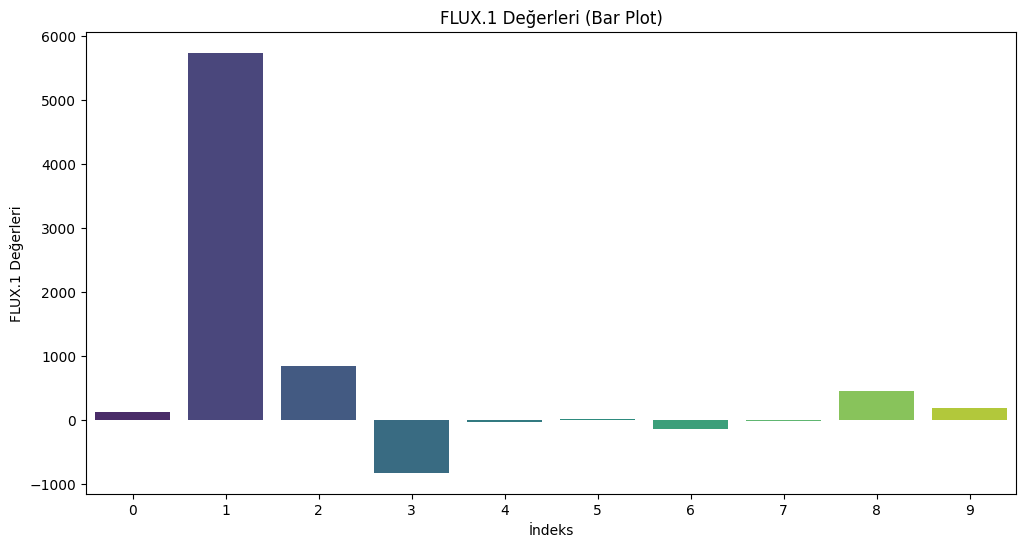

In [7]:
data = {
    'LABEL': [2, 2, 2, 2, 2, 1, 1, 1, 1, 1],
    'FLUX.1': [119.88, 5736.59, 844.48, -826.00, -39.57, 14.28, -150.48, -10.06, 454.66, 187.40],
}

df = pd.DataFrame(data)

# Bar plot çizimi
plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y='FLUX.1', data=df, palette='viridis')

# Başlık ve etiketler ekleme
plt.title('FLUX.1 Değerleri (Bar Plot)')
plt.xlabel('İndeks')
plt.ylabel('FLUX.1 Değerleri')

# Grafiği gösterme
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
y = df['LABEL'].values #hedef değişkeni
X = df.drop('LABEL', axis=1).values #tahminleyici değişkenler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Ön işleme
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeli oluştur ve eğit
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Tahmin yap
y_pred = knn_model.predict(X_test)

# Modeli değerlendir
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy}")

Doğruluk Skoru: 0.6666666666666666


Doğruluk skoru yaklaşık %66.67 olarak görünüyor. Bu, modelinizin test verilerinde doğru tahminlerde bulunma oranını temsil eder. Bu sonuç, modelinizin performansını değerlendirmek için başlangıç noktasıdır. 
Burada Train-Test Split tekniğiyle veri setinin performansını değerlendirdik. Yani, veriler ikiye ayrılıyor: eğitim verisi (X_train, y_train) ve test verisi (X_test, y_test). Model önce eğitim verisinde eğitiliyor, ardından test verisi üzerinde tahminler yapılıyor ve doğruluk skoru hesaplanıyor. 

K-En Yakın Komşu

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Pipeline oluştur
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Grid search parametreleri
param_grid = {
    'scaler': [StandardScaler(), None],  # Opsiyonel olarak standartlaştırma ekleyebilirsiniz
    'knn__n_neighbors': [3, 5, 7, 9]
}

# GridSearchCV ile grid search ve çapraz doğrulama
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"En İyi Parametreler: {grid_search.best_params_}")
print(f"En İyi Doğruluk Skoru: {grid_search.best_score_}")


En İyi Parametreler: {'knn__n_neighbors': 5, 'scaler': StandardScaler()}
En İyi Doğruluk Skoru: 0.5


**Unsupervised Learning**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


In [20]:
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1.008772,515.411351,738.046404,532.603246,739.618088,530.949807,729.591491,517.421404,720.723544,481.015211,...,60.027754,307.682825,88.976842,301.299895,105.121684,291.509561,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,12591.933126,12512.976544,12572.187328,12454.094432,12525.496793,12397.610716,...,9528.594808,9588.586341,9497.373179,9611.024800,9611.076529,9654.581767,9362.719825,9487.642217,9483.948248,9700.731923
min,1.000000,-59421.000000,-14663.430000,-56580.000000,-10817.590000,-54545.000000,-7744.500000,-53580.000000,-6373.400000,-53832.000000,...,-89126.500000,-89432.070000,-89759.940000,-90182.630000,-90225.760000,-90595.000000,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,1.000000,-22.230000,-22.912500,-22.985000,-18.662500,-20.980000,-21.245000,-22.675000,-22.200000,-22.685000,...,-9.602500,-12.842500,-15.222500,-14.350000,-17.370000,-18.272500,-24.000000,-27.360000,-36.855000,-29.475000
50%,1.000000,1.195000,0.410000,-1.125000,-0.880000,-1.495000,-2.650000,-4.330000,-3.910000,-3.890000,...,3.585000,3.795000,4.785000,3.910000,5.575000,7.150000,-4.385000,-4.995000,-5.135000,-3.785000
75%,1.000000,98.317500,89.710000,89.827500,73.257500,66.947500,45.147500,38.850000,37.150000,30.670000,...,23.445000,20.472500,25.582500,28.767500,27.455000,35.810000,17.755000,11.745000,12.265000,13.205000
max,2.000000,290882.500000,290653.500000,290554.000000,290486.500000,290289.000000,289982.500000,289197.500000,288520.500000,287404.500000,...,198420.000000,197888.500000,199639.000000,202007.000000,203730.500000,205924.000000,203193.000000,205050.000000,206884.500000,211488.500000


K-Means Kümeleme Algoritması

<Axes: title={'center': 'Quality Distribution Plot'}, xlabel='FLUX.1', ylabel='Density'>

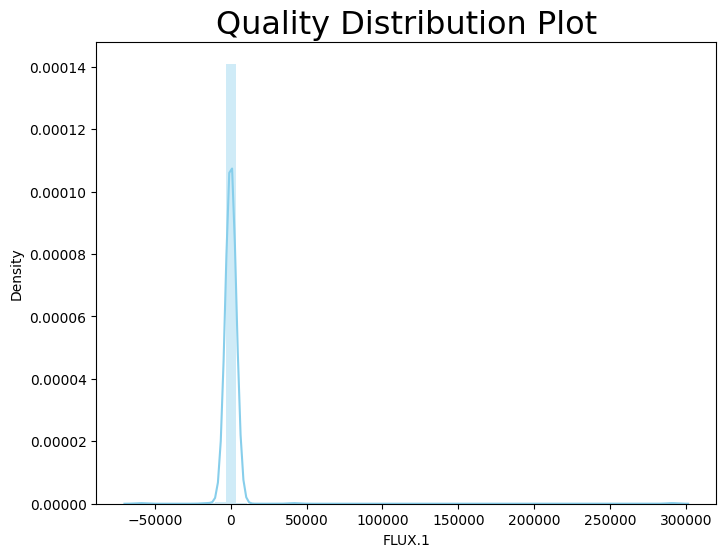

In [27]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Quality Distribution Plot',fontsize=23)
sns.distplot(df['FLUX.1'], color='skyblue')

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.float64)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=23)

sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

Text(0.5, 0.98, 'Positive and Negative Correlation Visualizations')

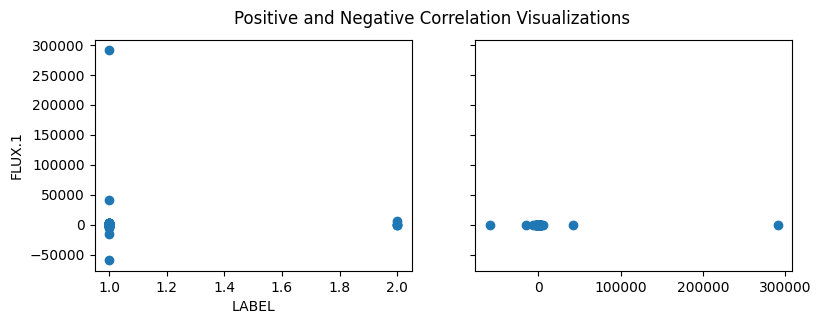

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(df["LABEL"].values, df["FLUX.1"].values)
axs[0].set_xlabel('LABEL')
axs[0].set_ylabel('FLUX.1')
axs[1].scatter(df["FLUX.1"].values, df["LABEL"].values)
axs[1].set_xlabel('')
fig.suptitle('Positive and Negative Correlation Visualizations')

In [35]:
scaler = StandardScaler()
df_dropped = df.drop('FLUX.1', axis=1)
X = df_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X)

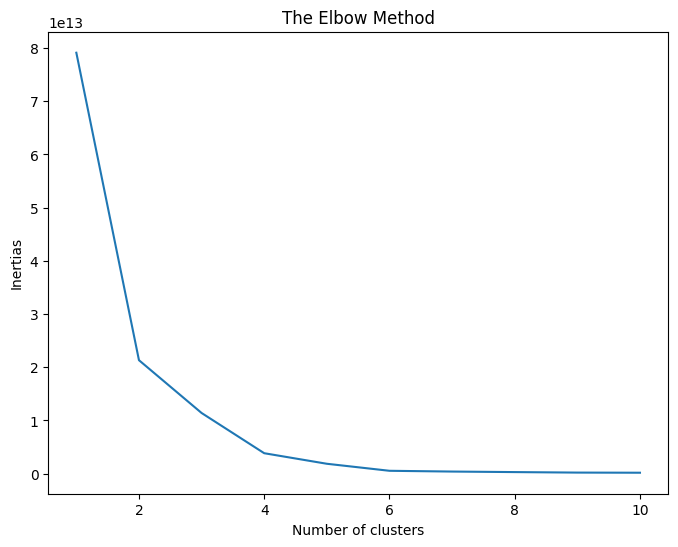

In [36]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [38]:
model = KMeans(n_clusters=3)
training_points = scaled_x[:100]
test_points = scaled_x[100:]
model.fit(training_points)
labels = model.predict(test_points)

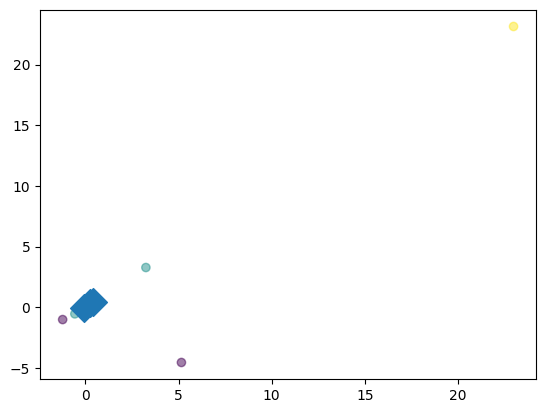

In [39]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

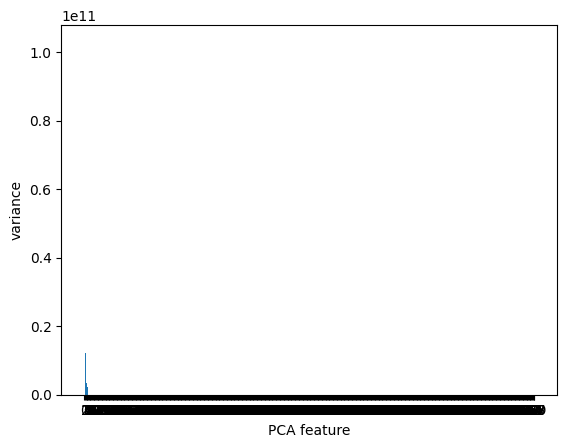

In [40]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [46]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.73938423 0.12542984]
0.8648140735055364


In [47]:
pca = PCA(n_components=2)
pca.fit(scaled_x)
pca_features = pca.transform(scaled_x)

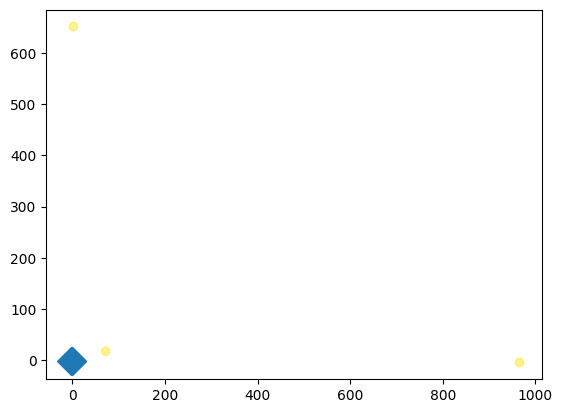

In [48]:
model = KMeans(n_clusters=3)
training_points = pca_features[:100]
test_points = pca_features[100:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

Hiyerarşik Kümeleme

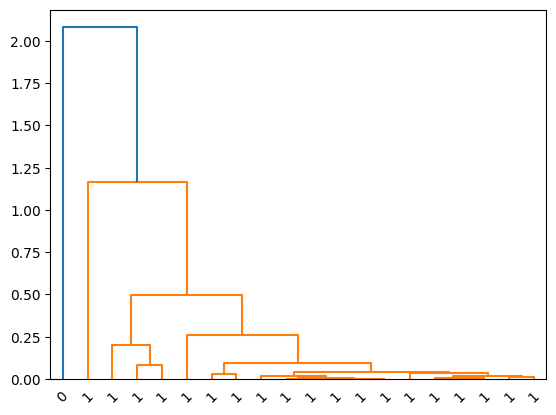

In [49]:
mergings = linkage(test_points[:20], method="complete")

dendrogram(mergings,
           labels=labels[:20],
           leaf_rotation=45,
           leaf_font_size=10,
)
plt.show()

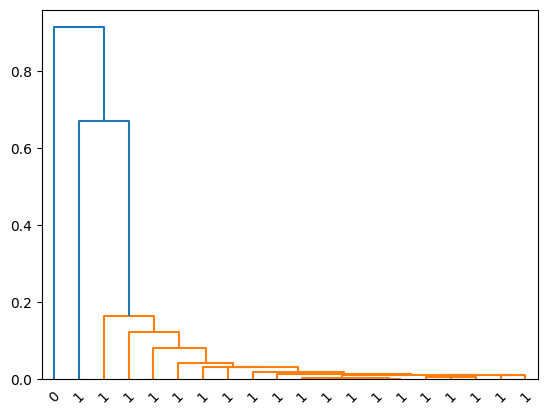

In [50]:
mergings = linkage(test_points[:20], method="single")

dendrogram(mergings,
           labels=labels[:20],
           leaf_rotation=45,
           leaf_font_size=10,
)
plt.show()